In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import re
import matplotlib.pyplot as plt
%matplotlib inline

In C:\Users\kaina\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\kaina\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\kaina\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\kaina\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\kaina\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
## Load data
df1 = pd.read_csv('Assignment 2 - USA_AL_Auburn-Opelika.AP.722284_TMY3_BASE.csv')
df2 = pd.read_csv('Assignment 2 - new.app4.csv')

In [3]:
def fun(df1,df2):
    df2.drop('Unnamed: 0',axis = 1,inplace = True) 
    df2.time = pd.to_datetime(df2.time)
    df2 = df2.resample('60min',on = 'time').sum() ## resample ## hourly consumption
    df2.W_min = df2.W_min/1000 ## change unit to kw
    df2.rename(columns={"W_min": "app4_electricity_consumption"},inplace = True)
    
    ## User-defined function to format date
    def my_to_datetime(date_str):
        pattern = r' ?([0-9]{2})/([0-9]{2})  ?([0-9]{2}):([0-9]{2}):([0-9]{2})'
        match = re.match(pattern,date_str)
        if match.groups()[2] != '24':
            date_str = '2013/'+'/'.join(list(match.groups()))
            return pd.to_datetime(date_str, format='%Y/%m/%d/%H/%M/%S')
    
        else:
            temp = list(match.groups())
            temp[2] = '00'
            date_str = '2013/'+'/'.join(temp)
            return pd.to_datetime(date_str, format='%Y/%m/%d/%H/%M/%S')+dt.timedelta(days=1)
    
    df1['Date/Time'] = df1['Date/Time'].apply(lambda x:my_to_datetime(x))
    overlap = df1.merge(df2, left_on='Date/Time', right_on='time')
    
    electricity = [column for column in overlap.columns if 'Electricity' in column or 'electricity' in column ]
    def fun(row):
        return row[electricity].sum()
    overlap['total_electricity'] = overlap.apply(fun, axis=1) ## Sum electricity consumptions for each day
    
    return overlap


In [4]:
overlap = fun(df1,df2)

In [6]:
overlap.set_index('Date/Time',inplace = True)

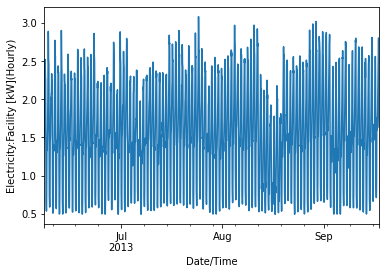

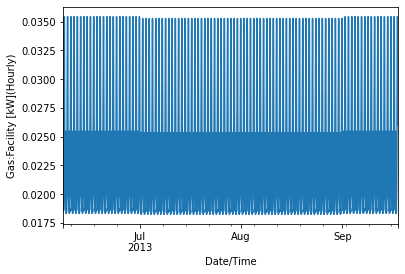

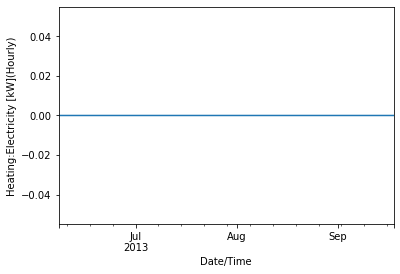

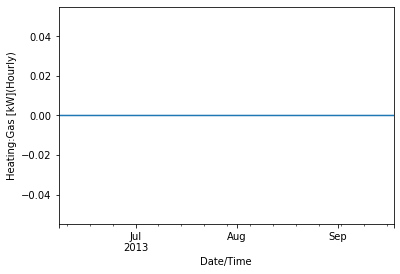

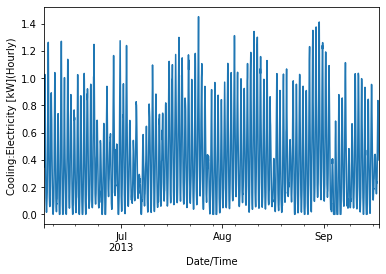

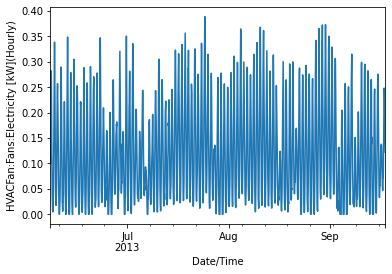

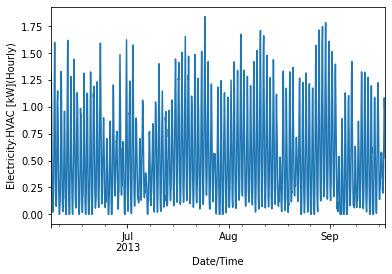

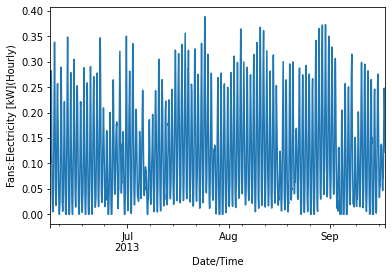

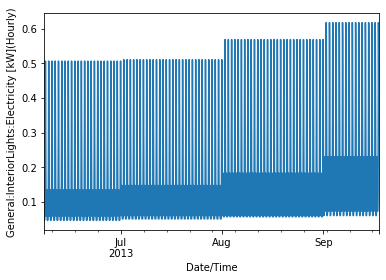

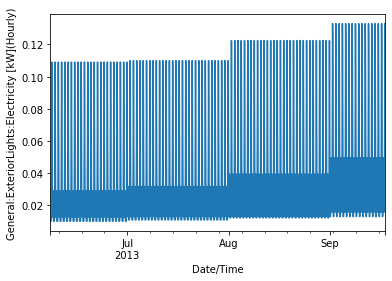

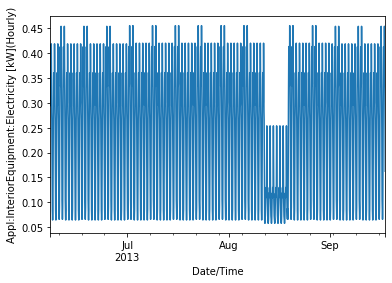

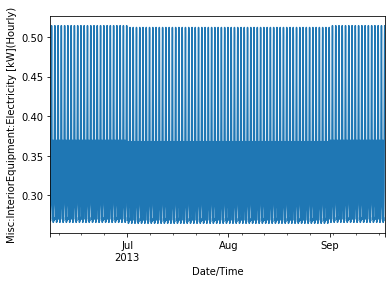

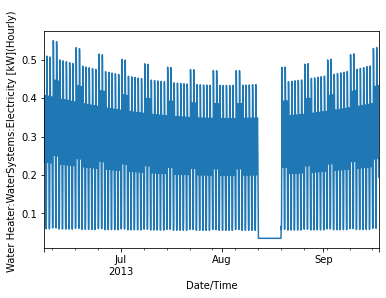

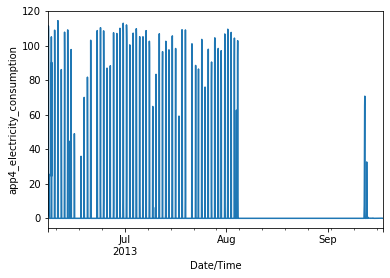

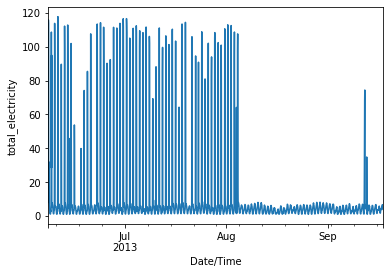

In [10]:
for column in overlap.columns:
    plt.figure()
    ax = overlap[column].plot()
    ax.set_ylabel(column)

In [149]:
overlap['day_of_week'] = overlap.index.to_series().apply(lambda x:x.dayofweek+1)
overlap['hour_of_day'] = overlap.index.to_series().apply(lambda x:x.hour)
overlap['month_of_year'] = overlap.index.to_series().apply(lambda x:x.month)

In [150]:
columns = overlap.columns.tolist()
remove = ['day_of_week','hour_of_day', 'month_of_year']
columns = [x for x in columns if x not in remove]

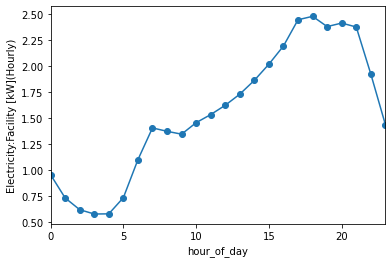

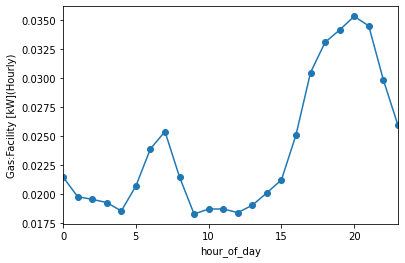

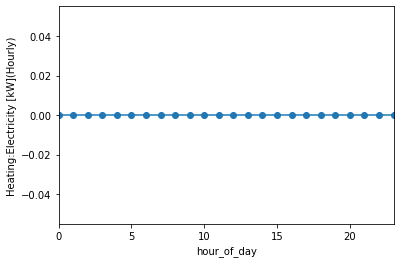

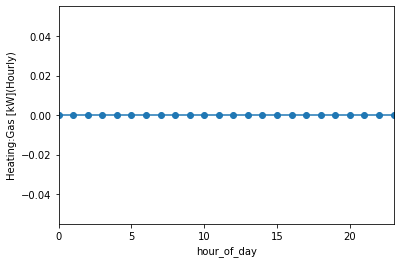

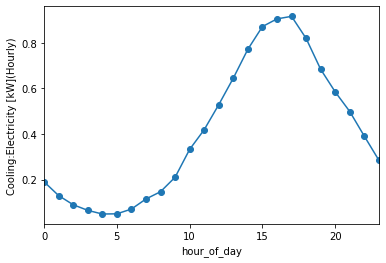

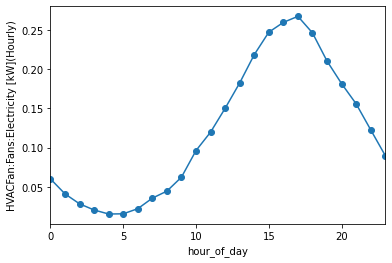

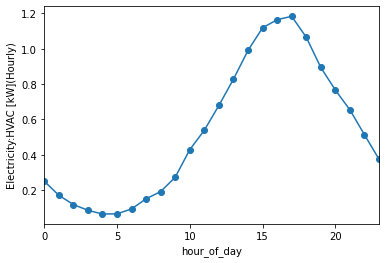

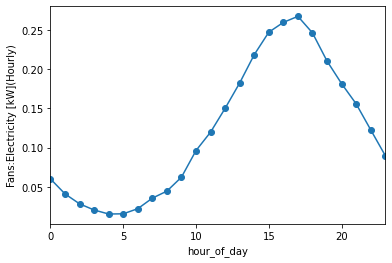

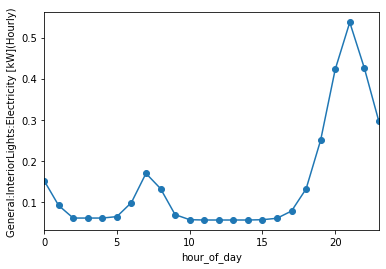

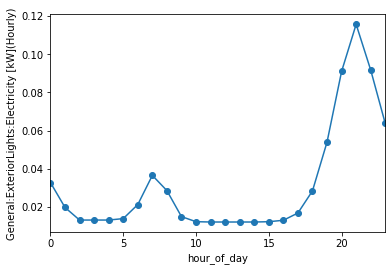

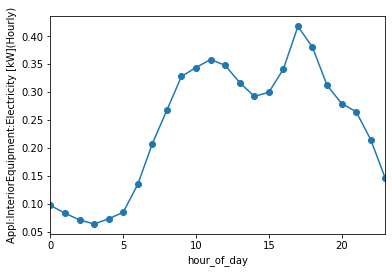

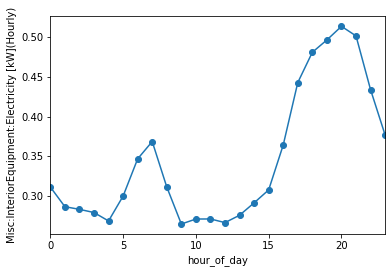

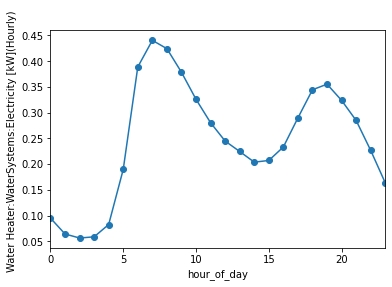

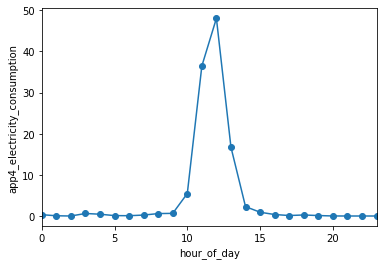

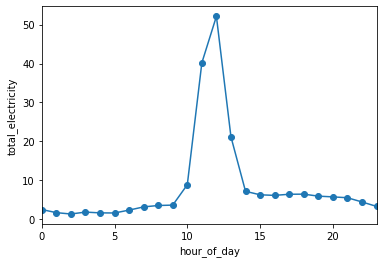

In [151]:
for column in columns:
    plt.figure()
    ax = overlap.groupby('hour_of_day').mean()[column].plot(marker='o', linestyle='-')
    ax.set_ylabel(column)

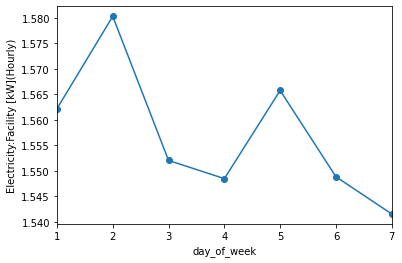

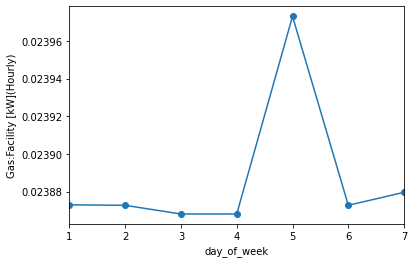

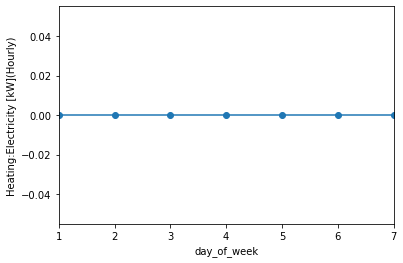

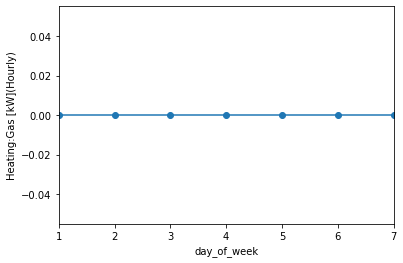

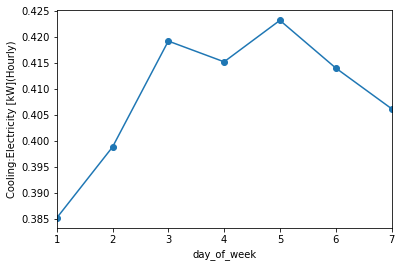

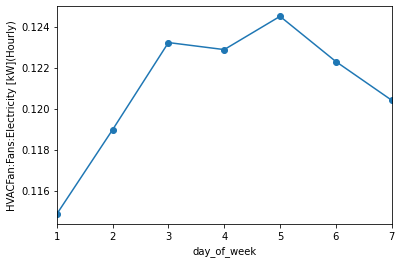

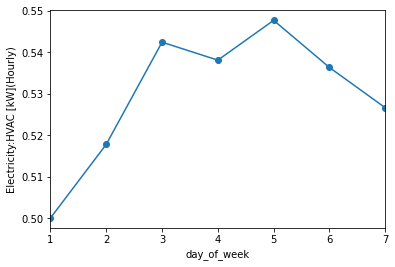

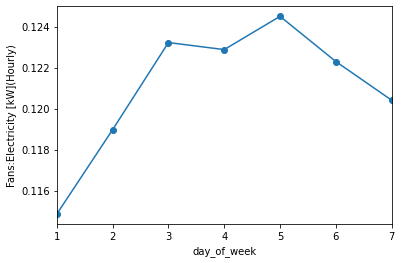

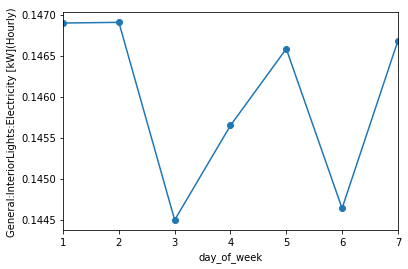

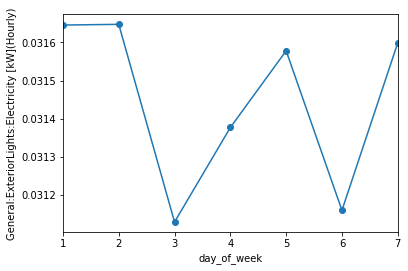

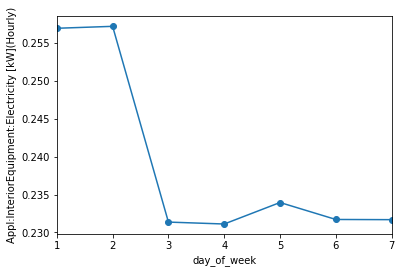

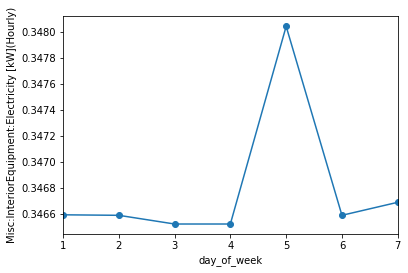

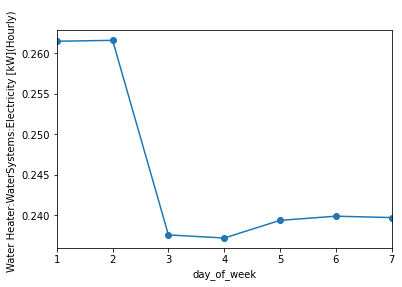

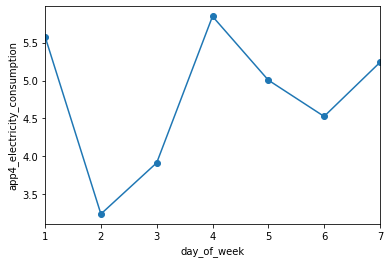

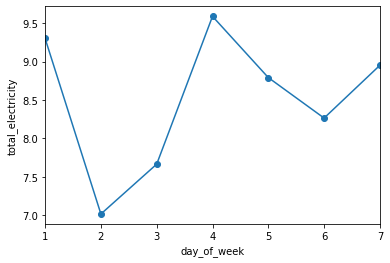

In [152]:
for column in columns:
    plt.figure()
    ax = overlap.groupby('day_of_week').mean()[column].plot(marker='o', linestyle='-')
    ax.set_ylabel(column)

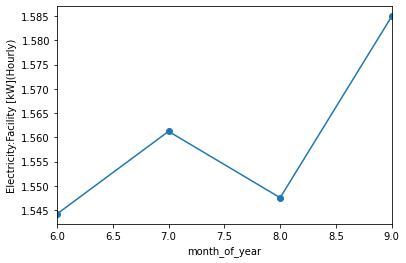

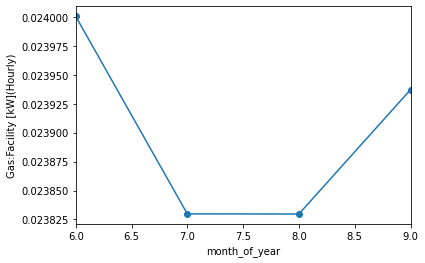

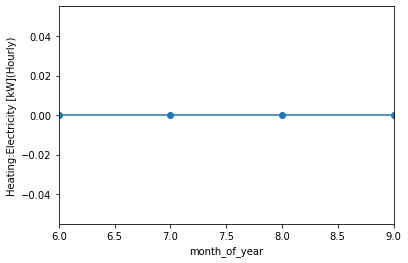

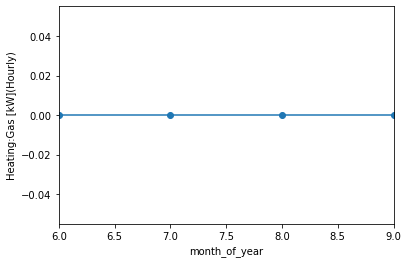

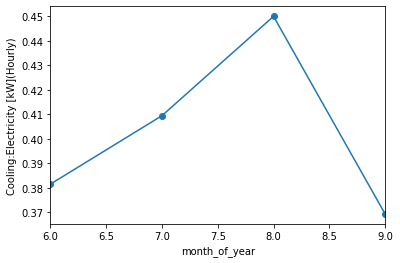

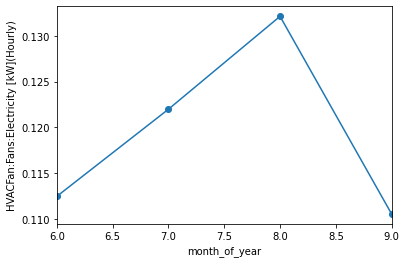

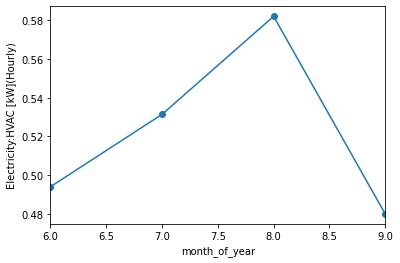

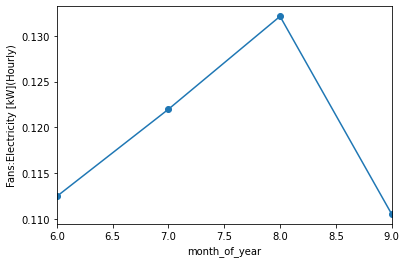

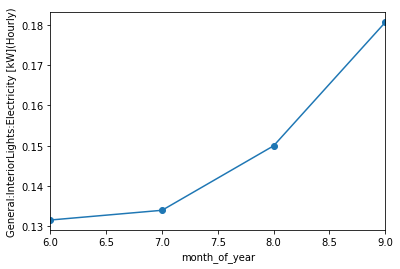

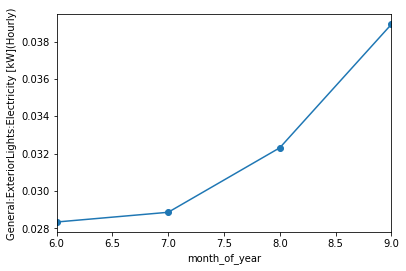

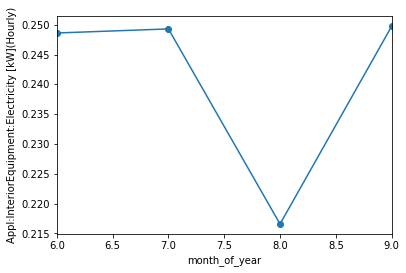

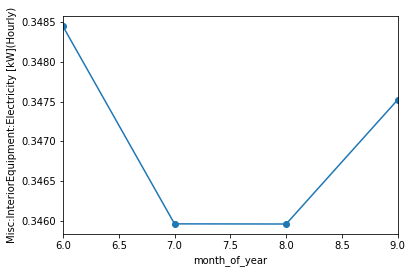

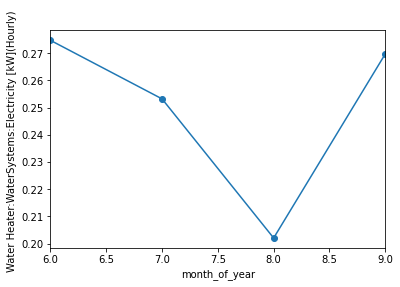

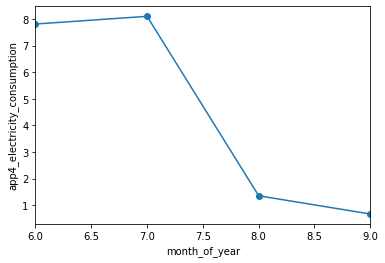

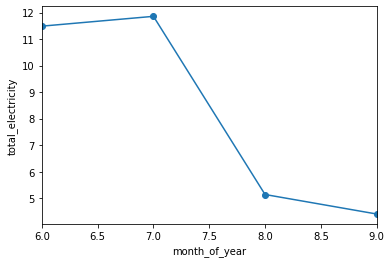

In [153]:
for column in columns:
    plt.figure()
    ax = overlap.groupby('month_of_year').mean()[column].plot(marker='o', linestyle='-')
    ax.set_ylabel(column)